#Linear regression

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

class LinearRegression:  
  def __init__(self,data_population,iters=1000,alpha=0.01,norm=False):
    self.matrix_dimension=len(data_population.columns)
    self.data=data_population.copy()
    self.iters=iters
    self.alpha=alpha
    self.norm=norm
    if self.norm:
      self.__normaliation()

    self.__getVectors()

  def drawGraph(self,x_size=10,y_size=5,soluthion=False):

    if self.matrix_dimension==2:
      plt.figure(figsize=(x_size, y_size))
      plt.plot(self.data[self.data.columns[0]],self.data[self.data.columns[1]],label = 'data point',color="red" ,marker='o',linestyle='none')
      if soluthion:
        plt.plot(self.data[self.data.columns[1]],self.__function(self.data[self.data.columns[1]]),label ="y={}+{}x".format(self.theta[0][0],self.theta[1][0]) )
      plt.xlabel(self.data.columns[0]), plt.ylabel(self.data.columns[1])
      plt.legend()
      plt.show()
    elif self.matrix_dimension==3:
      from mpl_toolkits.mplot3d import Axes3D
      fig = plt.figure(figsize=(x_size, y_size))
      ax = Axes3D(fig)

      if soluthion:
        ax.plot_trisurf(self.data[self.data.columns[0]],self.data[self.data.columns[1]],
                      self.__function(self.data[self.data.columns[0]],self.data[self.data.columns[1]]))
                      #label = "z={}+{}x+{}y".format(round(self.theta[0][0],1),round(self.theta[1][0],1),round(self.theta[2][0]),1))

        ax.plot(self.data[self.data.columns[0]],self.data[self.data.columns[1]],
                        self.__function(self.data[self.data.columns[0]],self.data[self.data.columns[1]]),
                        label = "z={}+{}x+{}y".format(round(self.theta[0][0],8),round(self.theta[1][0],8),round(self.theta[2][0]),8),color="blue")
      ax.set_title('Data plot with linear regression')
      ax.scatter(self.data[self.data.columns[0]],self.data[self.data.columns[1]],self.data[self.data.columns[2]],label = 'data point',color="red")
      ax.set_xlabel(self.data.columns[0]),ax.set_ylabel(self.data.columns[1]),ax.set_zlabel(self.data.columns[2])
      ax.legend()
      ax.view_init(40, 300)
    else:
      print("Unable to plot")

  def drawGraphDependenceFunctionIterations(self,x_size=10,y_size=5):

    plt.figure(figsize=(x_size, y_size))
    plt.plot([i for i in range(self.iters)],self.J_iters ,marker='o')
    plt.xlabel('Iters'), plt.ylabel('F()')
    plt.title('Plot of the dependence of the target function on the number of iterations')
    plt.show()


  def computeCost(self):
    return (((self.X.dot(self.theta)-self.Y).transpose().dot((self.X.dot(self.theta)-self.Y)))/(2*len(self.X)))[0][0] 

  def gradientDescent(self):
    self.J_iters=[]
    for iter in range(self.iters):
      self.J_iters.append(self.computeCost())
      self.theta=self.theta-((self.alpha/len(self.Y))*self.X.transpose()).dot((self.X.dot(self.theta)-self.Y))
    return self.theta

  def __getVectors(self):
    self.X = np.array(self.data[self.data.columns[:-1]])
    ones_vector = np.ones((len(self.X),1))
    self.X=np.hstack((ones_vector,self.X))
    self.Y = np.array(self.data[self.data.columns[-1:]])
    self.theta=np.resize(np.array([0 for _ in range(self.matrix_dimension)]),(self.matrix_dimension,1))

  def __normaliation(self):
    self.cof=[]
    for colum in list(self.data.columns):
      mean=self.data[colum].mean()
      std=self.data[colum].std()
      self.data[colum]=(self.data[colum]-mean)/std
      self.cof.append([mean,std])

  def getPredict(self,*nums):
    if len(nums)>self.matrix_dimension-1:
      print('too many options')
      sys.exit()

    if self.norm:
      result=self.theta[0][0]
      for i in range(len(nums)):
        nums_norm=(nums[i]-self.cof[i][0])/self.cof[i][1]
        result+=nums_norm*self.theta[i+1][0]
      result=result*self.cof[-1][1]+self.cof[-1][0]
    else:
      result=self.theta[0][0]
      for i in range(len(nums)):
        result+=nums[i]*self.theta[i+1][0]

    return result

  def __function(self,*nums):
    if len(nums)>self.matrix_dimension-1:
      print('too many options')
      sys.exit()
    result=self.theta[0][0]
    for i in range(len(nums)):
      result+=nums[i]*self.theta[i+1][0]
    return result


##univariate linear regression


load dataset

In [4]:
data_univariate = pd.read_csv("ex1data1.txt" ,header=None)
data_univariate.columns=['Population','Profit']
data_univariate.head(5)


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


iters=1000,alpha=0.01

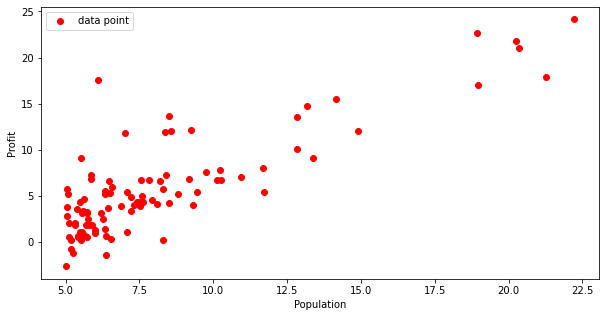

F(theta)=32.072733877455676
theta0=-3.241402144274422,theta1=1.1272942024281842
F(theta)=4.515955503078914


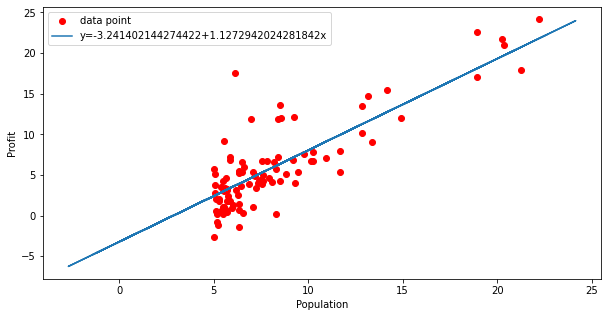

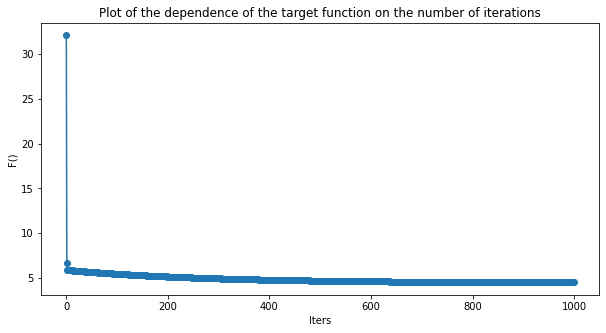

Predicting the benefits of opening a restaurant in a city of 10 million 8.03153988000742


In [5]:
predict=LinearRegression(data_univariate,iters=1000,alpha=0.01)
predict.drawGraph()
print('F(theta)={}'.format(predict.computeCost()))
theta=predict.gradientDescent()
print('theta0={},theta1={}'.format(theta[0][0],theta[1][0]))
print('F(theta)={}'.format(predict.computeCost()))
predict.drawGraph(soluthion=True)
predict.drawGraphDependenceFunctionIterations()


benefits_linear_regression=predict.getPredict(10)
print('Predicting the benefits of opening a restaurant in a city of 10 million {}'.format(benefits_linear_regression))


Conclusion: function value decreased after exposure to gradient


iters=200,alpha=0.05

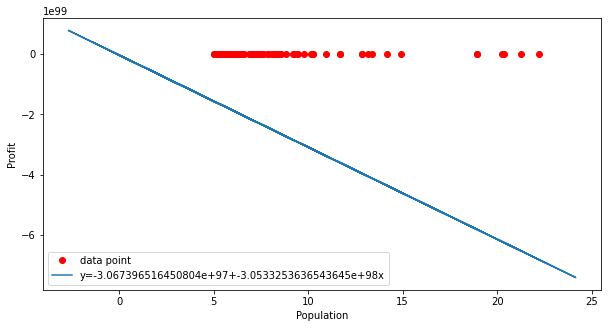

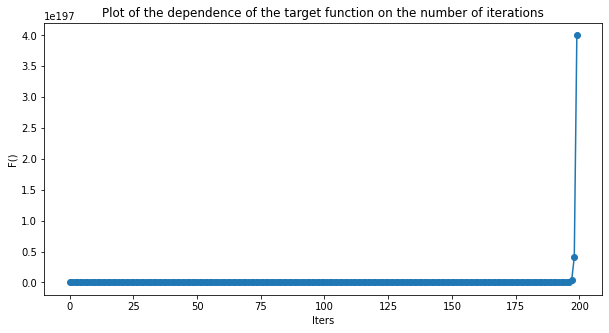

In [6]:
predict=LinearRegression(data_univariate,iters=200,alpha=0.05)
predict.gradientDescent()
predict.drawGraph(soluthion=True)
predict.drawGraphDependenceFunctionIterations()

iters=1000,alpha=0.001

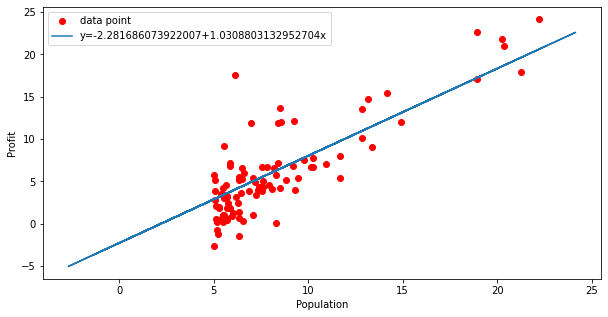

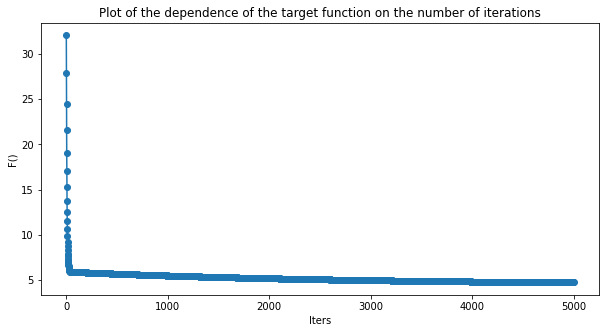

In [7]:
predict=LinearRegression(data_univariate,iters=5000,alpha=0.001)
predict.gradientDescent() 
predict.drawGraph(soluthion=True)
predict.drawGraphDependenceFunctionIterations()

Conclusion: If the step size alpha is too large, the probability to overcome the minimum is high. If alpha is too small, we use more iterations, but the probability of hitting the minimum decreases.



##multiple  linear regression 


In [8]:
data_multiple = pd.read_csv("ex1data2.txt",header=None)
data_multiple.colums=['size','bedrooms','price']

data_multiple.head(5)

C:\Users\nasta\AppData\Local\Temp\ipykernel_7232\1354286832.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_multiple.colums=['size','bedrooms','price']


,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


iters=1000,alpha=0.05

F(theta)=0.4893617021276595
F(theta)=0.130686480539042


<Figure size 720x360 with 0 Axes>

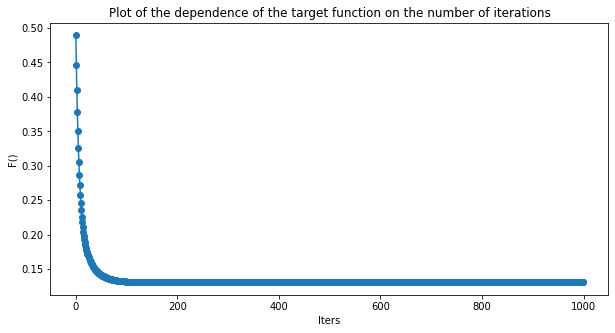

Price prediction for a 3000 foot 4 room house 472277.8551429191


In [9]:
predict=LinearRegression(data_multiple,iters=1000,alpha=0.05,norm=True)


print('F(theta)={}'.format(predict.computeCost()))
theta=predict.gradientDescent()
print('F(theta)={}'.format(predict.computeCost()))

predict.drawGraph(soluthion=True)
predict.drawGraphDependenceFunctionIterations()

price_linear_regression=predict.getPredict(3000,4)


print('Price prediction for a 3000 foot 4 room house {}'.format(price_linear_regression))


With multiple linear regression, you need to normalize the data because the range in each column is different.

Also, when submitting new data to the network,
they must first be brought to the same type of data on which the calculations were carried out.
After that, it is required to carry out the reverse operation so that the data is displayed in the desired range.

#Linear Regression in sklearn


univariate linear regression

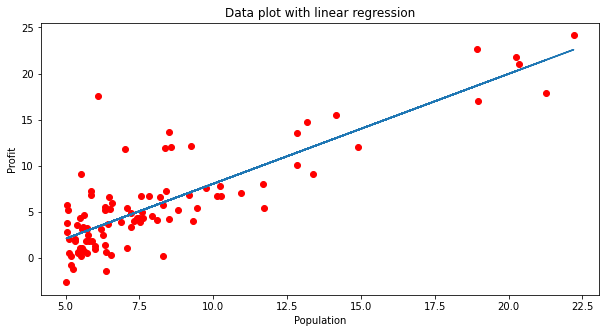

Predicting the benefits of opening a restaurant in a city of 10 million 8.034555563584085


In [10]:
from sklearn import linear_model
import matplotlib.pyplot as plt

data = pd.read_csv("ex1data1.txt",header=None)

model = linear_model.LinearRegression()
X = np.array(data[data.columns[:-1]])
Y = np.array(data[data.columns[-1:]])
model.fit(X, Y)

f = model.predict(X)

plt.figure(figsize=(10, 5))
plt.plot(data[data.columns[0]],data[data.columns[1]],label = 'data point',color="red" ,marker='o',linestyle='none')
plt.plot(data[data.columns[0]],f)
plt.xlabel('Population'), plt.ylabel('Profit')
plt.title('Data plot with linear regression')
plt.show()


benefits_sklearn=model.predict([[10]])[0][0]
print('Predicting the benefits of opening a restaurant in a city of 10 million {}'.format(benefits_sklearn))


multiple  linear regression 

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from time import sleep

data = pd.read_csv("ex1data2.txt",header=None)

model = linear_model.LinearRegression()
X = np.array(data[data.columns[:-1]])
Y = np.array(data[data.columns[-1:]])
model.fit(X, Y)

f = model.predict(X)


fig = plt.figure(figsize=(10, 5))
ax = Axes3D(fig)
ax.plot_trisurf(data[data.columns[0]],data[data.columns[1]],[list(i)[0] for i in f])
ax.scatter(data[data.columns[0]],data[data.columns[1]],data[data.columns[2]],label = 'data point',color="red")
ax.set_xlabel(data.columns[0]),ax.set_ylabel(data.columns[1]),ax.set_zlabel(data.columns[2])
ax.set_title('Data plot with linear regression')
ax.legend()
ax.view_init(40, 300)


price_sklearn=model.predict([[3000,4]])[0][0]
print('Price prediction for a 3000 foot 4 room house {}'.format(price_sklearn))


Price prediction for a 3000 foot 4 room house 472277.85514636274


<Figure size 720x360 with 0 Axes>

The value predicted by gradient descent and normal equation differs very slightly

In [12]:
print('difference for the benefit of opening a restaurant: {}'.format(abs(benefits_linear_regression-benefits_sklearn)))
print('difference for the benefit of opening a restaurant: {}'.format(abs(price_linear_regression-price_sklearn)))

difference for the benefit of opening a restaurant: 0.0030156835766650403
difference for the benefit of opening a restaurant: 3.4436234273016453e-06





How do Normal equation and gradient descent differ?


-Normal equation differs from gradient descent is that it’s analytical. Gradient descent takes an iterative approach which means our parameters are updated gradually until convergence. 

-Gradient descent requires us to define a learning rate that controls the size of the steps taken towards the minimum of the loss function. 